In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd/content/drive/MyDrive/데이터시각화/과제2

/content/drive/MyDrive/데이터시각화/과제2


In [6]:
csv1 = pd.read_csv('서울시 대기질 자료 제공_2020-2021.csv', encoding='cp949')

In [7]:
csv1.head()

,일시,구분,미세먼지(PM10),초미세먼지(PM25),Unnamed: 4
0,2020-01-01 0:00,평균,22.0,15.0,NaN
1,2020-01-01 0:00,강남구,19.0,13.0,NaN
2,2020-01-01 0:00,강동구,27.0,18.0,NaN
3,2020-01-01 0:00,강북구,21.0,13.0,NaN
4,2020-01-01 0:00,강서구,23.0,13.0,NaN


In [8]:
csv1_gn = csv1[csv1['구분'] == '평균']

In [9]:
csv1_gn = csv1_gn[csv1_gn['일시'].str.contains('10:00')]

In [10]:
#num1 = csv1_gn[csv1_gn['일시'].str.contains('10:00')].index
#csv1_gn.drop(num1, inplace = True)

In [11]:
#num2 = csv1_gn[csv1_gn['일시'].str.contains('20:00')].index
#csv1_gn.drop(num2, inplace = True)

In [12]:
len(csv1_gn)

517

In [13]:
csv1_gn.index = np.arange(1, len(csv1_gn) + 1)

In [14]:
csv1_gn

,일시,구분,미세먼지(PM10),초미세먼지(PM25),Unnamed: 4
1,2020-01-01 10:00,평균,28.0,18.0,NaN
2,2020-01-02 10:00,평균,53.0,35.0,NaN
3,2020-01-03 10:00,평균,78.0,53.0,NaN
4,2020-01-04 10:00,평균,68.0,45.0,NaN
5,2020-01-05 10:00,평균,57.0,39.0,NaN
...,...,...,...,...,...
513,2021-05-27 10:00,평균,18.0,9.0,NaN
514,2021-05-28 10:00,평균,17.0,10.0,NaN
515,2021-05-29 10:00,평균,30.0,15.0,NaN
516,2021-05-30 10:00,평균,15.0,7.0,NaN


In [15]:
csv1_gn.loc[csv1_gn['미세먼지(PM10)'].idxmax()]

일시             2021-03-29 10:00
구분                           평균
미세먼지(PM10)                508.0
초미세먼지(PM25)                82.0
Unnamed: 4                  NaN
Name: 454, dtype: object

In [16]:
csv1_gn.nlargest(2, ['미세먼지(PM10)'])

,일시,구분,미세먼지(PM10),초미세먼지(PM25),Unnamed: 4
454,2021-03-29 10:00,평균,508.0,82.0,NaN
494,2021-05-08 10:00,평균,488.0,94.0,NaN


Text(0.5, 1.0, '서울특별시 2020년 1월 ~ 2021년 5월 미세먼지 농도')

([<matplotlib.axis.XTick at 0x7fa9b26d3ad0>,
 [Text(0, 0, '2020-01-01'),
  Text(0, 0, '2021-03-29'),
  Text(0, 0, '2021-05-08')])

Text(0, 0.5, 'PM10')

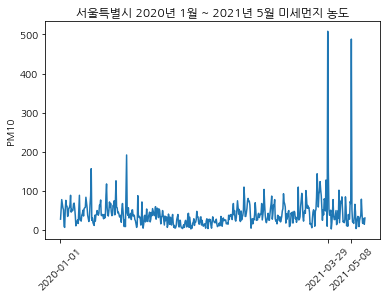

In [17]:
dates = ['2020-01-01', '2021-03-29', '2021-05-08']

plt.plot(csv1_gn['미세먼지(PM10)'])
plt.title('서울특별시 2020년 1월 ~ 2021년 5월 미세먼지 농도')
plt.xticks([0, 454, 494], labels=dates, rotation=45)
plt.ylabel('PM10')
plt.show()

In [18]:
#그래프 2

In [19]:
csv2 = pd.read_csv('경상남도_대기배출 사업장 현황_20210630.csv', encoding='cp949')

In [20]:
csv2.head()

,연번,관할지자체,지역,도로명주소,업체명,대표자,업종,종별,전화번호
0,1,경상남도,거제시,거제시 거제대로 3370(아주동),대우조선해양(주),대표이사,선박건조 및 수리업,1.0,055-735-9188
1,2,경상남도,거제시,거제시 장평3로 80(장평동),삼성중공업(주)거제조선소,대표이사,"선박, 해양플랜트",1.0,055-630-5373
2,3,경상남도,창원시,창원시 마산회원구 자유무역6길 157(봉암동),(주)동남,대표이사,비금속광물,2.0,055-256-7161
3,4,경상남도,진주시,진주시 남강로1367번길 36(상대동),남강제지(주),대표이사,제지,1.0,055-256-7161
4,5,경상남도,진주시,진주시 남강로1367번길 14(상대동),진주특종제지(주),대표이사,제지,2.0,055-256-7161


In [21]:
csv2['지역'].unique()

array(['거제시', '창원시', '진주시', '사천시', '함안군', '양산시', '통영시', '김해시', '고성군',
       '창녕군', '밀양시', '산청군', '창원시 의창구', '창원시 성산구', '창원시 마산합포구',
       '창원시 마산회원구', '창원시 진해구', '의령군', '남해군', '하동군', '함양군', '거창군', '합천군'],
      dtype=object)

In [22]:
csv2_si = csv2[csv2['지역'].str.contains('시')]

In [23]:
csv2_si.head()

,연번,관할지자체,지역,도로명주소,업체명,대표자,업종,종별,전화번호
0,1,경상남도,거제시,거제시 거제대로 3370(아주동),대우조선해양(주),대표이사,선박건조 및 수리업,1.0,055-735-9188
1,2,경상남도,거제시,거제시 장평3로 80(장평동),삼성중공업(주)거제조선소,대표이사,"선박, 해양플랜트",1.0,055-630-5373
2,3,경상남도,창원시,창원시 마산회원구 자유무역6길 157(봉암동),(주)동남,대표이사,비금속광물,2.0,055-256-7161
3,4,경상남도,진주시,진주시 남강로1367번길 36(상대동),남강제지(주),대표이사,제지,1.0,055-256-7161
4,5,경상남도,진주시,진주시 남강로1367번길 14(상대동),진주특종제지(주),대표이사,제지,2.0,055-256-7161


In [24]:
len(csv2_si)

4482

In [25]:
csv2_gj = csv2_si[csv2_si['지역'].str.contains('거제')]
csv2_cw = csv2_si[csv2_si['지역'].str.contains('창원')]
csv2_jj = csv2_si[csv2_si['지역'].str.contains('진주')]
csv2_sc = csv2_si[csv2_si['지역'].str.contains('사천')]
csv2_ys = csv2_si[csv2_si['지역'].str.contains('양산')]
csv2_ty = csv2_si[csv2_si['지역'].str.contains('통영')]
csv2_kh = csv2_si[csv2_si['지역'].str.contains('김해')]
csv2_my = csv2_si[csv2_si['지역'].str.contains('밀양')]

Text(0.5, 1.0, '경상남도 시 별 대기배출 사업장 현황')

<BarContainer object of 8 artists>

([<matplotlib.axis.XTick at 0x7fa9afe4f310>,
 [Text(0, 0, '거제시'),
  Text(0, 0, '창원시'),
  Text(0, 0, '진주시'),
  Text(0, 0, '사천시'),
  Text(0, 0, '양산시'),
  Text(0, 0, '통영시'),
  Text(0, 0, '김해시'),
  Text(0, 0, '밀양시')])

Text(0, 0.5, '사업장 수')

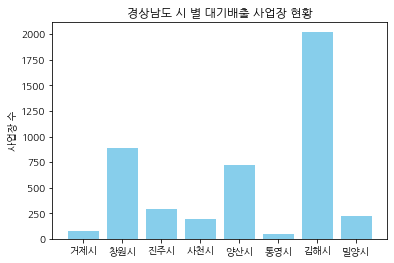

In [26]:
x = np.arange(0, 8)
regions = ['거제시', '창원시', '진주시', '사천시', '양산시', '통영시', '김해시', '밀양시']
values = [len(csv2_gj), len(csv2_cw), len(csv2_jj), len(csv2_sc), len(csv2_ys), len(csv2_ty), len(csv2_kh), len(csv2_my)]

plt.title('경상남도 시 별 대기배출 사업장 현황')
plt.bar(x, values, color='skyblue')
plt.xticks(x, regions)
plt.ylabel('사업장 수')

plt.show()

In [27]:
#그래프 3

In [28]:
csv3 = pd.read_csv('경상남도_대기배출 사업장 현황_20210630.csv', encoding='cp949')

In [29]:
csv3_1 = csv3[csv3['종별'] == 1]
csv3_2 = csv3[csv3['종별'] == 2]
csv3_3 = csv3[csv3['종별'] == 3]
csv3_4 = csv3[csv3['종별'] == 4]
csv3_5 = csv3[csv3['종별'] == 5]

Text(0.08900071568040373, 1.1978858369933925, '1.89%')

Text(0.3207337856458421, 1.1722470289136941, '3.08%')

Text(0.6579272448592051, 1.0784082315626418, '4.51%')

Text(0.4913178800809666, -0.09277252132363832, '36.97%')

Text(-0.49690536244624706, -0.05554332338061763, '53.55%')

Text(0.5, 1.0, '경상남도에 위치한 대기배출 사업장의 종별 비율')

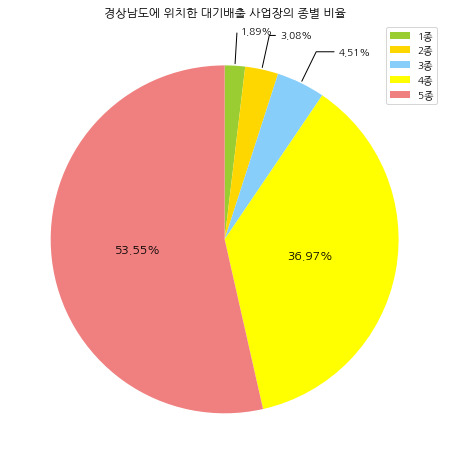

In [30]:
labels = ['1종', '2종', '3종', '4종', '5종']
sizes = [len(csv3_1)/len(csv3), len(csv3_2)/len(csv3), len(csv3_3)/len(csv3), len(csv3_4)/len(csv3), len(csv3_5)/len(csv3)]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'yellow', 'lightcoral']

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성

frequency = [len(csv3_1), len(csv3_2), len(csv3_3), len(csv3_4), len(csv3_5)]

pie = ax.pie(frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = colors, ## 색상 지정
       )

total = np.sum(frequency)

threshold = 5 #상한선 비율 = 5%
sum_pct = 0 #퍼센티지

bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0)
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')

for i,l in enumerate(labels):
    ang1, ang2 =  ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 원의 중심 좌표와 반지름길이
    
    if i < len(labels) - 1:
        sum_pct += float(f'{frequency[i]/total*100:.2f}')
        text = f'{frequency[i]/total*100:.2f}%'
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        text = f'{100-sum_pct:.2f}%'
    
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if frequency[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 ## 중심각
        x = np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=(x, y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config)
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center',fontsize=12)


plt.title('경상남도에 위치한 대기배출 사업장의 종별 비율')
plt.legend(pie[0],labels,loc='upper right') ## 범례
plt.show()

In [31]:
#그래프 4

In [32]:
csv4 = pd.read_csv('주택도시보증공사 융자업무 현황_20211231.csv', encoding='cp949')

In [33]:
csv4.head()

,연월,월,지점,융자잔액(건수),융자잔액(억원),융자금이자 수입실적(천원)
0,2021,1,서울북부지사,31.0,490.0,8119.0
1,2021,2,서울북부지사,31.0,490.0,11422.0
2,2021,3,서울북부지사,31.0,489.0,13639.0
3,2021,4,서울북부지사,31.0,484.0,12012.0
4,2021,5,서울북부지사,28.0,467.0,9357.0


In [34]:
csv4_n = csv4[csv4['지점'] == '서울북부지사']
csv4_e = csv4[csv4['지점'] == '서울동부지사']
csv4_w = csv4[csv4['지점'] == '서울서부지사']
csv4_s = csv4[csv4['지점'] == '서울남부지사']

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, '2021년 서울특별시 지사별 주택도시보증공사 융자금이자 수입실적')

([<matplotlib.axis.XTick at 0x7fa9afc53f90>,
 [Text(0, 0, '1월'),
  Text(0, 0, '2월'),
  Text(0, 0, '3월'),
  Text(0, 0, '4월'),
  Text(0, 0, '5월'),
  Text(0, 0, '6월'),
  Text(0, 0, '7월'),
  Text(0, 0, '8월'),
  Text(0, 0, '9월'),
  Text(0, 0, '10월'),
  Text(0, 0, '11월'),
  Text(0, 0, '12월')])

Text(0, 0.5, '수입실적(천원)')

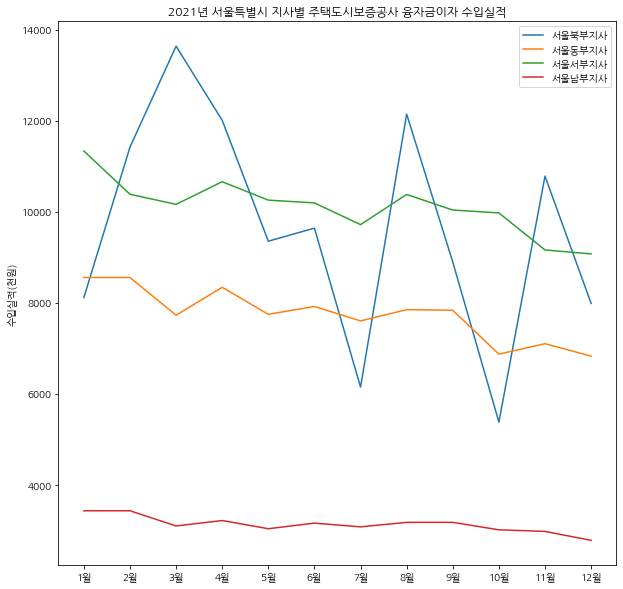

In [35]:
months = ['1월','2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

plt.figure(figsize=(10, 10))
num = np.arange(12)
plt.plot(num, csv4_n['융자금이자 수입실적(천원)'], label = '서울북부지사')
plt.plot(num, csv4_e['융자금이자 수입실적(천원)'], label = '서울동부지사')
plt.plot(num, csv4_w['융자금이자 수입실적(천원)'], label = '서울서부지사')
plt.plot(num, csv4_s['융자금이자 수입실적(천원)'], label = '서울남부지사')


plt.title('2021년 서울특별시 지사별 주택도시보증공사 융자금이자 수입실적')
plt.xticks(np.arange(12), labels=months)
plt.ylabel('수입실적(천원)')
plt.legend(loc='upeer right')
plt.show()

In [36]:
#그래프5

In [37]:
csv5 = pd.read_csv('서울특별시 강북구_장애인전용주차구역 불법주차 적발건수 및 과태료 부과액_20220613.csv', encoding='cp949')

In [38]:
csv5.head()

,연번,연도,부과금액,위반장소
0,1,2018,100000,서울 강북구 솔샘로 174 SK 아파트
1,2,2018,100000,서울 강북구 삼각산로 58 국립재활원
2,3,2018,100000,삼양로77길 27
3,4,2018,100000,강북구 수유동 289-13 부근
4,5,2018,100000,강북구 솔매로7다길 23


In [39]:
csv5['연도'].unique()

array([2018, 2019, 2020, 2021, 2022])

In [40]:
csv5_8 = csv5[csv5['연도'] == 2018]
csv5_9 = csv5[csv5['연도'] == 2019]
csv5_0 = csv5[csv5['연도'] == 2020]
csv5_1 = csv5[csv5['연도'] == 2021]
csv5_2 = csv5[csv5['연도'] == 2022]

In [41]:
csv5_2[' 부과금액 ']

2889    100000
2890    100000
2891    100000
2892    100000
2893    100000
         ...  
3440    100000
3441    100000
3442    100000
3443    100000
3444    100000
Name:  부과금액 , Length: 556, dtype: int64

In [42]:
total8 = np.sum(csv5_8[' 부과금액 '])
total9 = np.sum(csv5_9[' 부과금액 '])
total0 = np.sum(csv5_0[' 부과금액 '])
total1 = np.sum(csv5_1[' 부과금액 '])
total2 = np.sum(csv5_2[' 부과금액 '])

In [43]:
total8

103990000

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, '서울특별시 강북구 장애인전용주차구역 불법주차 과태료부과금액')

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x7fa9b12d0490>,
 [Text(0, 0, '2018년'),
  Text(0, 0, '2019년'),
  Text(0, 0, '2020년'),
  Text(0, 0, '2021년'),
  Text(0, 0, '2022년')])

([<matplotlib.axis.YTick at 0x7fa9afaf2ad0>,
 [Text(0, 0, '2'),
  Text(0, 0, '4'),
  Text(0, 0, '6'),
  Text(0, 0, '8'),
  Text(0, 0, '10')])

Text(0.5, 0, '연도')

Text(0, 0.5, '과태료(천만원)')

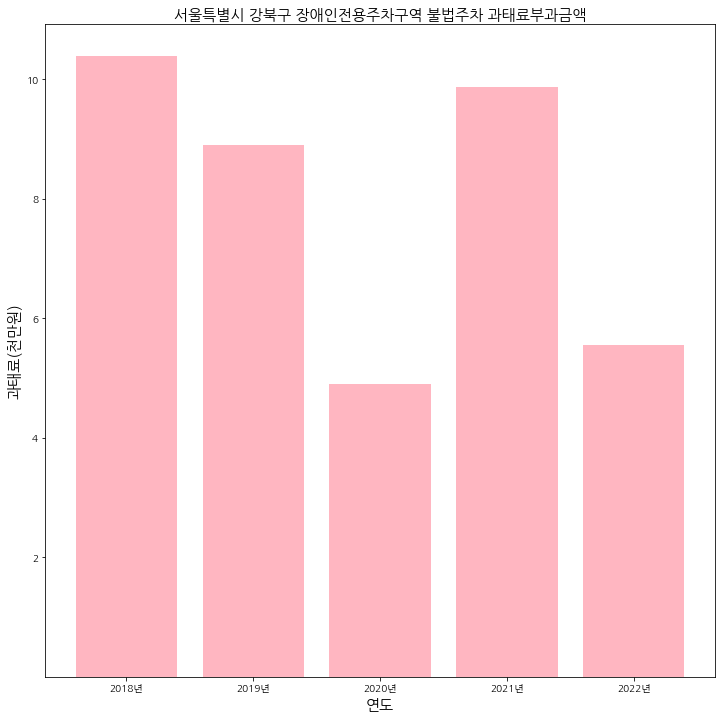

In [44]:
x = np.arange(5)
years = ['2018년', '2019년', '2020년', '2021년', '2022년']
fee = ['2', '4', '6', '8', '10']
values = [total8, total9, total0, total1, total2]

plt.figure(figsize=(12, 12))
plt.title('서울특별시 강북구 장애인전용주차구역 불법주차 과태료부과금액', fontsize=15)
plt.bar(x, values, color='lightpink')
plt.xticks(x, years)
plt.yticks([20000000, 40000000, 60000000, 80000000, 100000000], fee)
plt.xlabel('연도', fontsize=15)
plt.ylabel('과태료(천만원)', fontsize=15)

plt.show()

In [45]:
#그래프6

In [46]:
csv6 = pd.read_csv('경기도 광주시_횡단보도_20220516.csv', encoding='cp949')

In [47]:
csv6.head()

,지형지물부호,관리번호,행정구역,법정구역,도엽번호,관리기관,도로구간번호,공사번호,설치일자,신호등유무,보토턱낮춤유무,장애인시설유무,횡단보도폭,횡단보도길이,횡단보도방식,대장초기화여부,도형최종수정일자,속성최종수정일자
0,횡단보도,92022129,오포읍,오포읍,3770914943,광주시,100086,NaN,2017-01-01,없음,있음,없음,4.09,10.33,일자형,대장입력완료,2017-12-20,2017-12-20
1,횡단보도,92022128,곤지암읍,곤지암읍,3771012984,광주시,262416,NaN,2010-01-01,없음,없음,없음,5.46,5.55,지그재그형,대장입력완료,2016-10-27,2016-10-27
2,횡단보도,92022127,남한산성면,남한산성면,3770904481,광주시,340173,NaN,2012-01-01,없음,없음,없음,3.22,6.69,일자형,대장입력완료,2015-05-10,2015-05-10
3,횡단보도,92022126,남한산성면,남한산성면,3770904472,광주시,340011,NaN,2012-01-01,없음,없음,없음,0.00,0.00,일자형,대장입력완료,2015-05-09,2015-05-09
4,횡단보도,92022124,송정동,송정동,3771006421,광주시,900023,NaN,2012-01-01,없음,있음,있음,1.56,4.15,일자형,대장입력완료,2014-05-27,2014-05-27


In [48]:
csv6['장애인시설유무'].unique()

array(['없음', '있음', '미분류'], dtype=object)

In [49]:
csv6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지형지물부호    2058 non-null   object 
 1   관리번호      2058 non-null   int64  
 2   행정구역      2026 non-null   object 
 3   법정구역      2026 non-null   object 
 4   도엽번호      2058 non-null   object 
 5   관리기관      2058 non-null   object 
 6   도로구간번호    2058 non-null   int64  
 7   공사번호      1601 non-null   object 
 8   설치일자      2026 non-null   object 
 9   신호등유무     2058 non-null   object 
 10  보토턱낮춤유무   2058 non-null   object 
 11  장애인시설유무   2058 non-null   object 
 12  횡단보도폭     2026 non-null   float64
 13  횡단보도길이    2026 non-null   float64
 14  횡단보도방식    2058 non-null   object 
 15  대장초기화여부   2055 non-null   object 
 16  도형최종수정일자  2026 non-null   object 
 17  속성최종수정일자  2023 non-null   object 
dtypes: float64(2), int64(2), object(14)
memory usage: 289.5+ KB


In [50]:
csv6_O = csv6[csv6['장애인시설유무'] == '있음']
csv6_X = csv6[csv6['장애인시설유무'] == '없음']
csv6_Q = csv6[csv6['장애인시설유무'] == '미분류']

Text(0.5, 1.0, '경기도 광주시 횡단보도 장애인시설 유무 비율')

([<matplotlib.patches.Wedge at 0x7fa9ae9f7490>,
 [Text(-1.0886947082012028, -0.15730172387707061, '시설O'),
  Text(1.0953892731942365, 0.10060984132281657, '시설X'),
  Text(0.05706664642877002, 1.0985187289552116, '미분류')],
 [Text(-0.593833477200656, -0.08580094029658397, '54.6%'),
  Text(0.5974850581059471, 0.05487809526699085, '43.8%'),
  Text(0.031127261688420005, 0.59919203397557, '1.7%')])

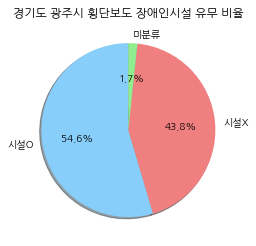

In [51]:
labels = ['시설O', '시설X', '미분류']
sizes = [len(csv6_O)/len(csv6), len(csv6_X)/len(csv6), len(csv6_Q)/len(csv6)]
colors = ['lightskyblue', 'lightcoral', 'lightgreen']
plt.title('경기도 광주시 횡단보도 장애인시설 유무 비율')
plt.pie(sizes, labels = labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()